In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import gamma

# Random Variable

In [3]:
# Scale and shape
shape = 3
scale = 2

# Significance
alfa = 0.05


In [7]:
# Generates samples from the Chi square distribution
rv = gamma.rvs(shape, scale = scale, size = 10000)

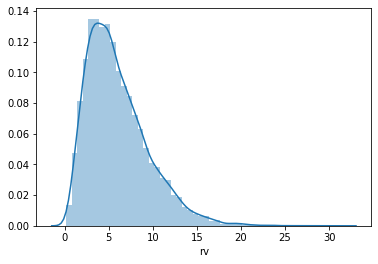

In [8]:
# Visualize distribution
df = pd.DataFrame(data = {"rv": rv})
sns.distplot(df["rv"], bins = 50, kde=True)

# Quantiles

In [10]:
quantile = 0.1
np.round(gamma.ppf(quantile, a = shape, scale = scale),2)

2.2

In [11]:
quantile = 0.9
np.round(gamma.ppf(quantile, a = shape, scale = scale),2)

10.64

# Centrality

In [12]:
gamma.mean(a = shape, scale = scale)

6.0

In [13]:
gamma.var(a = shape, scale = scale)

12.0

# PDF

In [14]:
# Get the quantiles of 1% and 99% of probability
x = np.linspace(gamma.ppf(0.01, a = shape, scale = scale), gamma.ppf(0.99, a = shape, scale = scale), 100)

In [15]:
# Get the value of the density
y = gamma.pdf(x, a = shape, scale = scale)

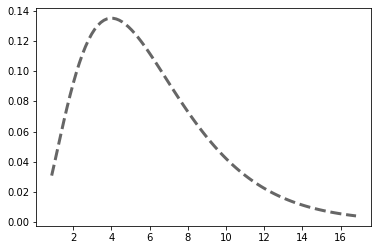

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y,'--k', lw=3, alpha=0.6, label='chi2 pdf')

# CDF

In [17]:
# Get the quantiles of 1% and 99% of probability
x = np.linspace(gamma.ppf(0.01, a = shape, scale = scale), gamma.ppf(0.99, a = shape, scale = scale), 100)

In [18]:
# Get the value of the density
y = gamma.cdf(x, a = shape, scale = scale)

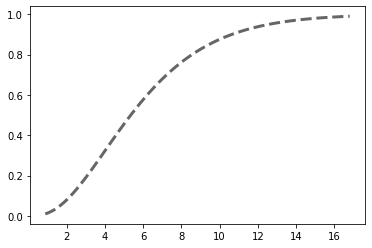

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y,'--k', lw=3, alpha=0.6, label='chi2 cdf')

# Likelihood

In [41]:
# Given sample variance
S = 105.977
S2 = S**2

# Sample size
n = 513

# Alfa
al = 0.05

In [42]:
# Quantiles for the given significance levels
qtiles = np.round(chi2.ppf([al/2, 1 - al/2], n-1),2)
qtiles

array([451.2 , 576.59])

In [54]:
# Values of sigma is (n-1) * S^2 in the quantiles
ival = np.round((n-1)*S2 / qtiles,2)
ival = np.sqrt(ival[::-1])
ival

array([ 99.86495882, 112.89171803])

In [44]:
# Range of sigmas going further the confidence interval
sigmaVals = np.linspace(90,120, 1000)

In [45]:
# Likelihood using gamma
likeVals = gamma.pdf((n-1)*S2, a = (n-1)/2, scale = 2*sigmaVals**2)

In [47]:
# Normalize likelihood
likeVals = likeVals / max(likeVals)

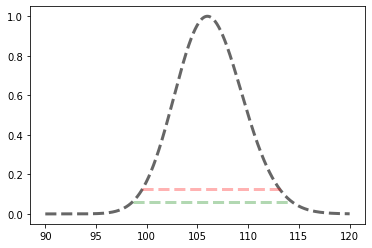

In [53]:
fig, ax = plt.subplots(1, 1)
ax.plot(sigmaVals, likeVals,'--k', lw=3, alpha=0.6, label='example')

h_18 = sigmaVals[likeVals >= 1/8]
ax.plot(h_18, [1/8 for xx in h_18],'--r', lw=3, alpha=0.3, label='1/8 relative evidence')

h_116 = sigmaVals[likeVals >= 1/16]
ax.plot(h_116, [1/16 for xx in h_116],'--g', lw=3, alpha=0.3, label='1/16 relative evidence')
